In [1]:


import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
import matplotlib.ticker as ticker



In [2]:

with open('checkpoint.pickle', 'rb') as f:
    avg_ramp_up = pickle.load(f)
    avg_ramp_down = pickle.load(f)
    t_el = pickle.load(f)
    ql_sta = pickle.load(f)
    ql_dyn = pickle.load(f)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 8
plt.rcParams['figure.dpi'] = 300


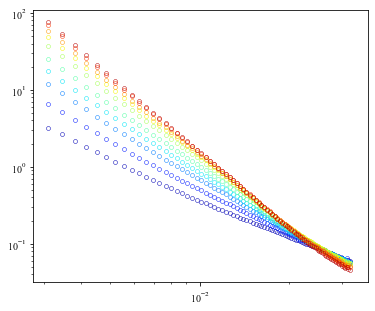

In [3]:

fig, ax = plt.subplots(1, 1, figsize=(6,5))

g2_idx = 0 
total_size = 0
for avg_dict in avg_ramp_up:
    total_size += len(avg_dict['temperature_x'])

accu_size = 0
for avg_dict in avg_ramp_up:
    curr_size = len(avg_dict['temperature_x'])
    idx = accu_size + np.arange(curr_size) * 1.0
    idx /= total_size
    accu_size += curr_size

    cmap = plt.get_cmap('jet')
    color = cmap(np.mean(idx))
          
    for i in range(len(ql_sta[:-15])):
        if i % 3 == 0:  # Plot every third marker
            ax.loglog(ql_sta[i], avg_dict['saxs_1d'][i], 'o-', color=color, lw=0.5, ms=4, mew=0.5, mfc='none')
    ax.set_xscale('log')
    ax.set_yscale('log')

plt.savefig('H02_RampUp_SAXS.pdf')
